# Eksam2022

Student number: 107740

### Exercise 1
#### a)

/Users/Bard/anaconda3/lib/python3.8/site-packages/skimage/_shared/utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)


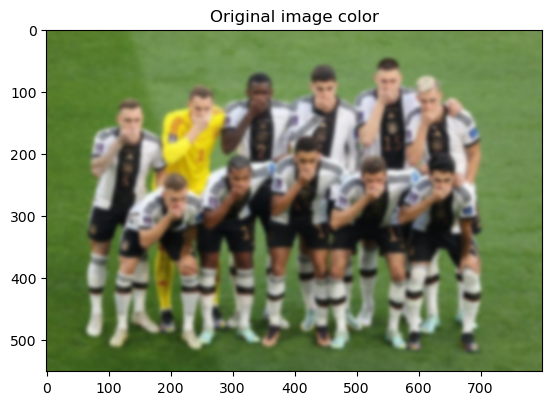

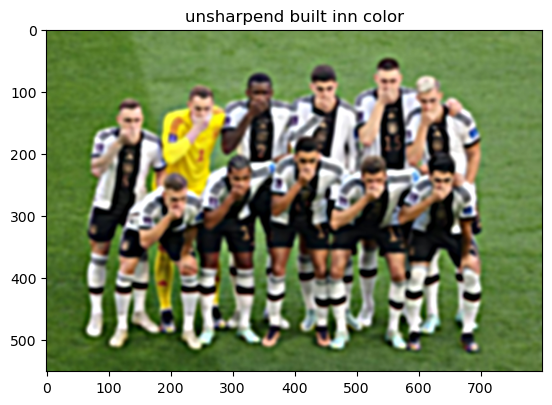

In [1]:
#Import librarys
import numpy as np
import skimage
import matplotlib.pyplot as plt

#Read image
soccerteam_image_color = skimage.io.imread('soccerteam.jpeg')

#Unsharpend mask with build inn function.
soccerteam_unsharpened_built_inn = skimage.filters.unsharp_mask(soccerteam_image_color, radius=5, amount=2)

#Plot results
plt.title("Original image color")
plt.imshow(soccerteam_image_color)
plt.show()

plt.imshow(soccerteam_unsharpened_built_inn)
plt.title("unsharpend built inn color")
plt.show()

Tried with both manual and built-in unsharpened mask as well as Laplace sharpen method. The built-in skimage unsharpened mask gave the best results.

The point of the unsharpened mask is to take the image, unsharpen it, and subtract the original image from this unsharp image. This will yield a sharper image.

The point of Laplace sharpening is to get the edges and add these to the image, this will create the effect of a sharper image.

#### b)

Canny filter is a type of multi-stage edge detector. That can detect a wide range of edges in images. Some of the stages include:
- Gaussian filter, to remove noise. This makes edges more accurate.
- Sobel filter, which is used to find edge gradient and direction for each pixel
- Non-maximum Suppression, used to remove unwanted pixels which may not be part of an edge.
- Hysteresis Thresholding, is used to double-check that an edge is an edge. Create two threshold values, a min and a max value. Edges that have an intensity gradient of more than the max value are edges and if any edges are below the min value we remove them because we know that they are not real edges.


The image on the left, with the fewest edges, is the original one.

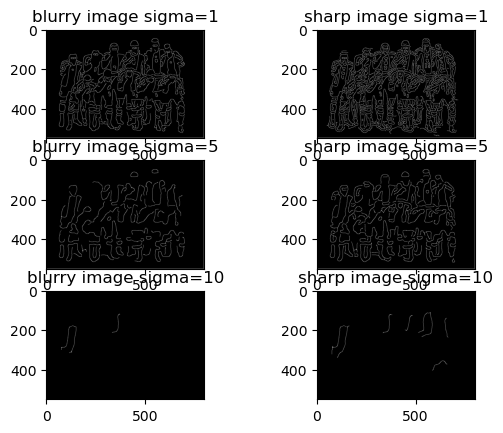

In [2]:
#Read image
soccerteam_image = skimage.color.rgb2gray(soccerteam_image_color)
soccerteam_unsharpened_built_inn = skimage.color.rgb2gray(soccerteam_unsharpened_built_inn)

#Blurred image with different sigma values
blurry_image_1 = skimage.feature.canny(soccerteam_image, sigma=1)
blurry_image_5 = skimage.feature.canny(soccerteam_image, sigma=5)
blurry_image_10 = skimage.feature.canny(soccerteam_image, sigma=10)

#Sharpend image with different sigma values
sharp_image_1 = skimage.feature.canny(soccerteam_unsharpened_built_inn, sigma=1)
sharp_image_5 = skimage.feature.canny(soccerteam_unsharpened_built_inn, sigma=5)
sharp_image_10 = skimage.feature.canny(soccerteam_unsharpened_built_inn, sigma=10)

#Plot results
fig = plt.figure()
fig.add_subplot(3, 2, 1)
plt.imshow(blurry_image_1, cmap='gray')
plt.title('blurry image sigma=1')

fig.add_subplot(3, 2, 3)
plt.imshow(blurry_image_5, cmap='gray')
plt.title('blurry image sigma=5')

fig.add_subplot(3, 2, 5)
plt.imshow(blurry_image_10, cmap='gray')
plt.title('blurry image sigma=10')

fig.add_subplot(3, 2, 2)
plt.imshow(sharp_image_1, cmap='gray')
plt.title('sharp image sigma=1')

fig.add_subplot(3, 2, 4)
plt.imshow(sharp_image_5, cmap='gray')
plt.title('sharp image sigma=5')

fig.add_subplot(3, 2, 6)
plt.imshow(sharp_image_10, cmap='gray')
plt.title('sharp image sigma=10')

plt.show()

Since sigma in Canny filter is the standard deviation of the Gaussian filter, the higher the sigma the more the picture will be smoothened. Therefore we lose a lot of the edges when the sigma is higher.

### Exercise 2
#### a)

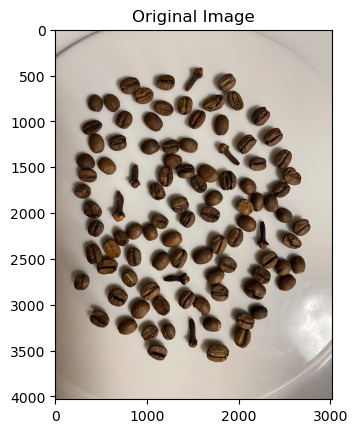

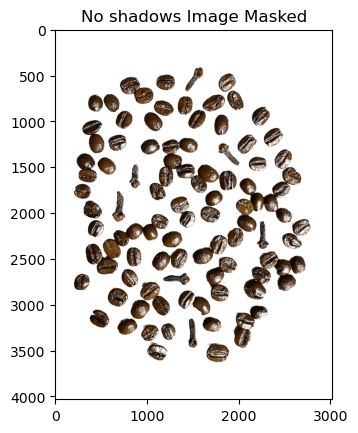

In [3]:
#Import librarys
import skimage
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import scipy

#Get image
coffeebeans_image = skimage.io.imread('coffeebeans.jpg')
plt.imshow(coffeebeans_image)
plt.title('Original Image')
plt.show()


#Brown has a red ratio much higher then shadows/gray therefor i am thresholding based on the red ratio
def remove_based_on_red(image, fraction=0.45):
    shape = np.shape(image)
    temp_image = image
    for i in range(shape[0]):
        for j in range(shape[1]):
            #Need this because we cant devid by zero.
            if (int(image[i][j][0])+int(image[i][j][1])+int(image[i][j][2])) == 0:
                continue
                #Here we take the red value devided by all the values combined to get the fraction of red.
            elif (int(image[i][j][0]) / (int(image[i][j][0])+int(image[i][j][1])+int(image[i][j][2]))) < fraction:
                temp_image[i][j][0] = 255
                temp_image[i][j][1] = 255
                temp_image[i][j][2] = 255
    return temp_image


no_background_coffee = remove_based_on_red(coffeebeans_image)

plt.imshow(no_background_coffee)
plt.title('No shadows Image Masked')
plt.show()

Since both coffee beans and shadows are dark it's hard to remove them by thresholding. Therefore I thresholded with the fraction of red in each pixel. Brown(coffee beans and cloves) have a much higher fraction of red than grey (shadow). This way I get to remove everything that isn't red enough.

#### b)

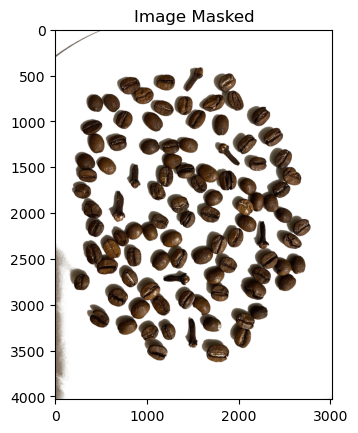

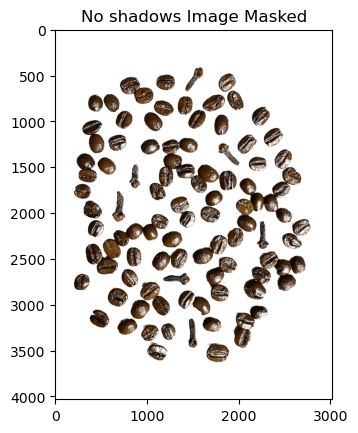

In [4]:
#Function to thershold and mask image
def masked_image(image):
    shape = np.shape(image)
    temp_image = skimage.color.rgb2gray(image)
    thres_image = skimage.filters.threshold_otsu(temp_image)
    binary_image = temp_image > thres_image
    for i in range(shape[0]):
        for j in range(shape[1]):
            if binary_image[i][j] == 1:
                image[i][j][0] = 255
                image[i][j][1] = 255
                image[i][j][2] = 255
    return image

coffeebeans_image_1 = skimage.io.imread('coffeebeans.jpg')
masked_coffee = masked_image(coffeebeans_image_1)


#Plott results
plt.imshow(masked_coffee)
plt.title('Image Masked')
plt.show()

plt.imshow(no_background_coffee)
plt.title('No shadows Image Masked')
plt.show()

I already have the image without shadows masked. So the only thing I had to do was to threshold the original image with otsu thresholding. This way I get the background removed, but keep the shadows and beans and cloves. 


#### c)

/var/folders/7x/qyhpfc0518313f53n8x1h4m40000gn/T/ipykernel_7654/1417883950.py:20: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_maxi = skimage.feature.peak_local_max(distance, min_distance=100, indices=False,


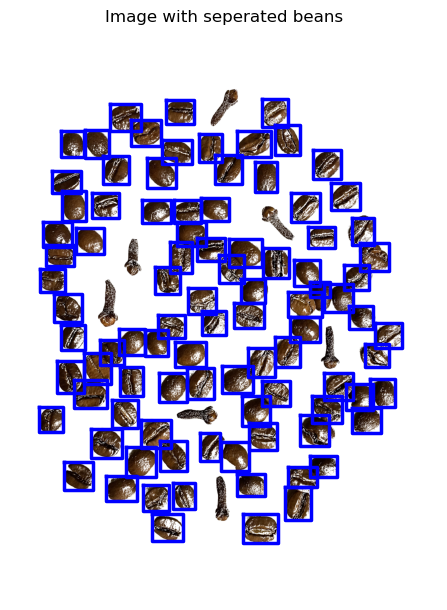

Number of beans : 93 



In [5]:
#Need math to calculate size for later task.
import math

#Threshold agin on the image without shadows
grayscale_image = skimage.color.rgb2gray(no_background_coffee)
thresh = skimage.filters.threshold_yen(grayscale_image)
binary_image = grayscale_image > thresh

#Fill holes if there are any
binary_invert_image = np.invert(binary_image)
img_fill_holes = scipy.ndimage.binary_fill_holes(binary_invert_image).astype(bool)


#Remove noise
image_erode = skimage.morphology.erosion(img_fill_holes, skimage.morphology.disk(3))
image_dilate = skimage.morphology.dilation(image_erode, skimage.morphology.disk(3))

#Separate Non stop that are close to each other
distance = scipy.ndimage.distance_transform_edt(image_dilate)
local_maxi = skimage.feature.peak_local_max(distance, min_distance=100, indices=False,
                                            footprint=np.ones((3, 3)), labels=image_dilate)
markers = scipy.ndimage.label(local_maxi)[0]
labels = skimage.segmentation.watershed(-distance, markers, mask=image_dilate)

#Create objects from the Non stop
properties = skimage.measure.regionprops(labels)

#Create and plot squares that separate Non stop, broken Non stop and m&m
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(coffeebeans_image)

handle = {}
number_of_beans= 0 
list_of_centers = []
for prop in properties:
    printing = False
    #Formula for circularity and roundnes
    circularity = 4 * np.pi * (prop.area / prop.perimeter ** 2)
    roundnes = 4 * prop.area / (np.pi * prop.axis_major_length**2)
    #Check to see if properti is bean or clove.
    if prop.area > 13000:
        minr, minc, maxr, maxc = prop.bbox
        bx = (minc, maxc, maxc, minc, minc)
        by = (minr, minr, maxr, maxr, minr)
        ax.plot(bx, by, '-b', linewidth=2.5)
        
        number_of_beans += 1
        y0, x0 = prop.centroid
        area = prop.area 
        tuple1 = (y0,x0,area)
        list_of_centers.append(tuple1)
    
    #Not all beans was in the first criteria
    elif 8000 < prop.area < 10000 and roundnes < 0.23:
        minr, minc, maxr, maxc = prop.bbox
        bx = (minc, maxc, maxc, minc, minc)
        by = (minr, minr, maxr, maxr, minr)
        ax.plot(bx, by, '-b', linewidth=2.5)
        
        number_of_beans += 1
        y0, x0 = prop.centroid
        area = prop.area
        tuple1 = (y0,x0,area)
        list_of_centers.append(tuple1)
        
    elif 10000 < prop.area < 11000 and circularity > 0.6:
        minr, minc, maxr, maxc = prop.bbox
        bx = (minc, maxc, maxc, minc, minc)
        by = (minr, minr, maxr, maxr, minr)
        ax.plot(bx, by, '-b', linewidth=2.5)
        
        number_of_beans += 1
        y0, x0 = prop.centroid
        area = prop.area
        tuple1 = (y0,x0,area)
        list_of_centers.append(tuple1)


#Plott results
ax.set_axis_off()
plt.tight_layout()
plt.title('Image with seperated beans')
plt.show()
print('Number of beans :', number_of_beans, '\n')

Here I use the skimage regionprops function. This mask out all the objects that have a different value than the background. Then I need some criteria to only get the beans, and so that I get every bean. When that is done I plot to see if all beans have been accounted for and count up all the beans. It's 93 beans in total.

#### d)
At the same time as I count the beans, I also add their x and y coordinates for their centre in a tuple and add that tuple to a list for all the beans.

In [6]:
print('List of all beans with center coords and size, (x,y,size) :', list_of_centers)

List of all beans with center coords and size, (x,y,size) : [(580.5980463891125, 1202.9599034169898, 27334), (583.064212231978, 1869.264197158684, 26537), (615.943712772998, 813.4159166115155, 30220), (725.8834925058627, 966.2424633789892, 29423), (802.7641472679459, 436.4760397389695, 20534), (777.2003289096264, 1960.0366390025624, 26147), (805.7282913165266, 1728.9324229691877, 31416), (803.2035298384172, 616.4601684329291, 24817), (832.3134151921904, 1415.3205841976815, 26224), (861.4182731978096, 1179.830057760108, 26662), (939.1962268834553, 2235.6611642050393, 24171), (983.7873450750163, 1544.6478944698122, 27594), (987.480986481829, 751.3265806303374, 26113), (1027.2186059005237, 1812.7357747235528, 22337), (1009.297272511124, 1067.9959580177303, 29441), (1073.3610743254428, 396.5420046349942, 24164), (1163.173946922125, 2362.7623412934868, 21817), (1246.831993712714, 450.93977065695, 27993), (1251.9998189193104, 2081.9900405620747, 27612), (1264.5361028285922, 1449.476952212104

#### e)
It's difficult because not all beans have the same shape. As well as spaces or that skimage regionprops split a bean in two so I get two smaller sizes. 

I tried using the formula for ellipsis as this is the closest to a bean I could get. I ended up getting an answer close to the built-in .area function. So I used this instead. This value is added to the tuple with the x and y centre coordinates.

### Exercise 3
#### a)

bands =  {'blue': 11, 'green': 41, 'red': 75, 'NIR': 124}


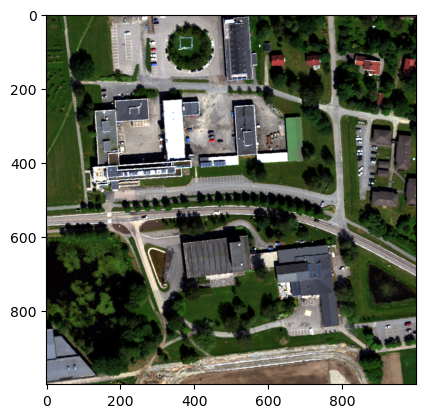

In [7]:
#Import librarys
from spectral import *
import numpy as np
import matplotlib.pyplot as plt

#Load image with spectral
hyperim = np.load("nmbu.npy")
wavelength = envi.read_envi_header('nmbu.hdr')['wavelength']
ww = [float(i) for i in wavelength]


#Function to get image band to corresponding wavelengths
def color_band(image_band, wavelength_in_function):
    diff_band = []
    for i, value in enumerate(image_band):
        index_tuple = (i, abs(value - wavelength_in_function))
        diff_band.append(index_tuple)
    closest = sorted(diff_band, key=lambda t: t[1])[0]

    return closest[0]

#create dictonary with colors and teir corosponding bands
bands = {
    'blue': color_band(ww, 440),
    'green': color_band(ww, 535),
    'red': color_band(ww, 645),
    'NIR': color_band(ww, 800)}

print("bands = ", bands)

#Plott image with red, green and blue bands.
imshow(hyperim, (bands['red'], bands['green'], bands['blue']),
       stretch=((0.02, 0.98), (0.02, 0.98), (0.02, 0.98)))

plt.show()

I displayed the RGB image, with the wavebands, blue: 11, green: 41 and red: 75. Their wavelength corresponds with
red: 654nm, blue: 440nm and green: 535nm

#### b)

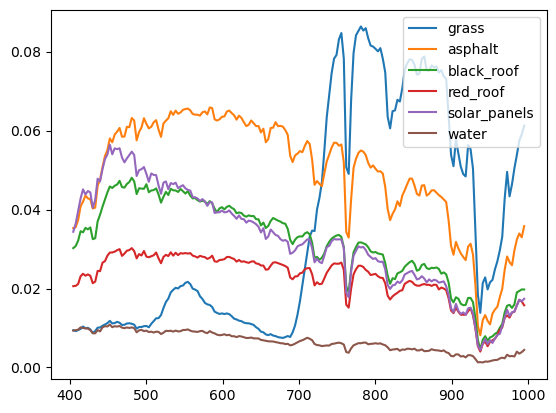

In [8]:
#Find pixles with the materials as varibal name
grass = np.array(hyperim[200, 10, :].reshape(-1, 1))
asphalt = np.array(hyperim[573, 790, :].reshape(-1, 1))
black_roof = np.array(hyperim[700, 700, :].reshape(-1, 1))
red_roof = np.array(hyperim[138, 877, :].reshape(-1, 1))
solar_panels = np.array(hyperim[410, 429, :].reshape(-1, 1))
water = np.array(hyperim[735, 886, :].reshape(-1, 1)) 

#Plott the materials with the wavebands to se the spectrum as a function of wavelength.
plt.figure()
plt.plot(ww, grass)
plt.plot(ww, asphalt)
plt.plot(ww, black_roof)
plt.plot(ww, red_roof)
plt.plot(ww, solar_panels)
plt.plot(ww, water)
plt.legend(['grass', 'asphalt', 'black_roof', 'red_roof', 'solar_panels', 'water'])
plt.show()

The grass is recognizable by the peaks at the green wavelength 500-600 nm. Vegetation reflects more infrared radiation compared to other region types. This is the way the grass also has a high value of around 800 nm. 


We also see that the values are higher at the read wavelength for the red roofs and the blue wavelength has a higher value for water.
Asphalt which is grey absorbs most of the wavelengths and that means it doesn't have any characteristics about them in the plot.
#### c)

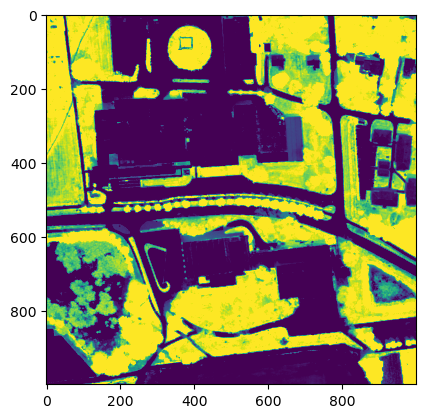

In [9]:
#Define image with just the one bands.
band_nir = hyperim[:, :, bands['NIR']]
band_red = hyperim[:, :, bands['red']]

#Function to calculate the NDVI from red and nir band
def calculate_NDVI(NIR, Red):
    NDVI = (NIR - Red) / (NIR + Red)
    return NDVI

ndvi_ima = calculate_NDVI(band_nir, band_red)

#Plott the results
plt.imshow(ndvi_ima, vmin=0, vmax=0.7)
plt.show()

The green regions are mostly vegetation, the brighter or closer to yellow the green colour is, the healthier the vegetation is supposed to be. Healthie vegetation reflects more infrared-radiation.

#### d)

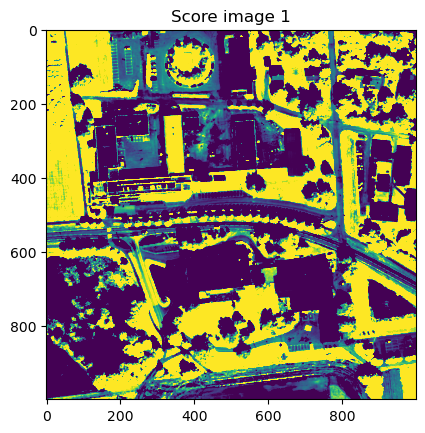

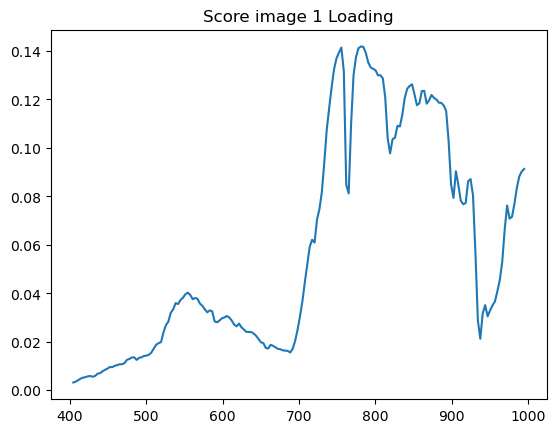

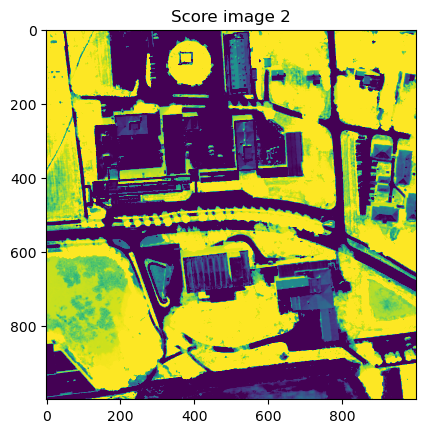

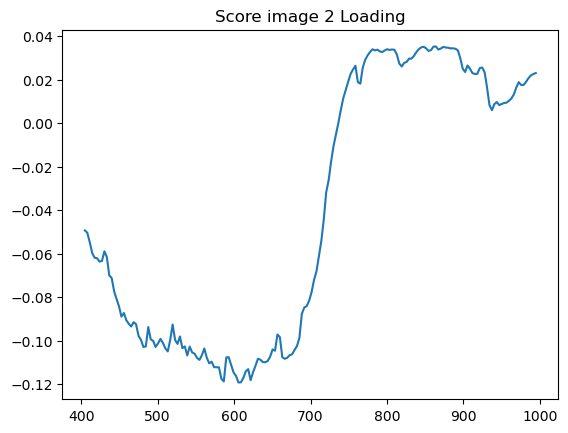

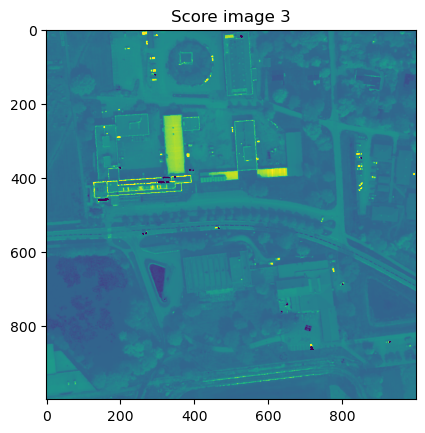

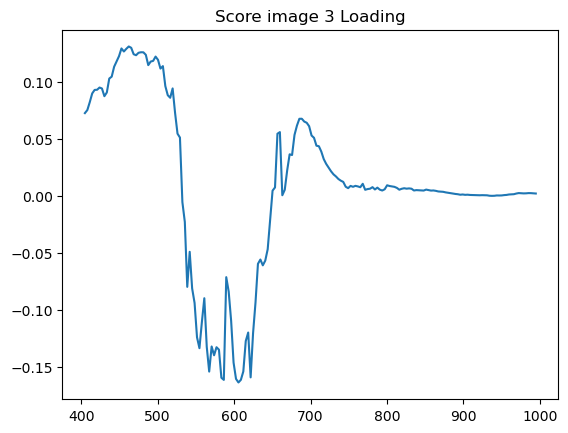

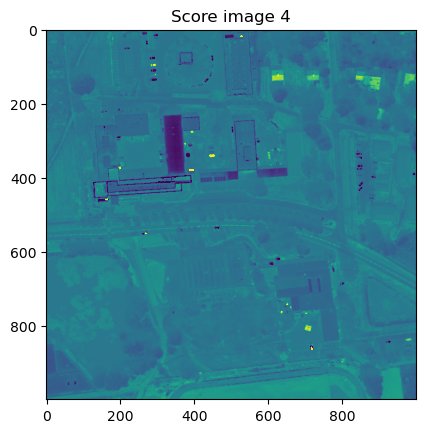

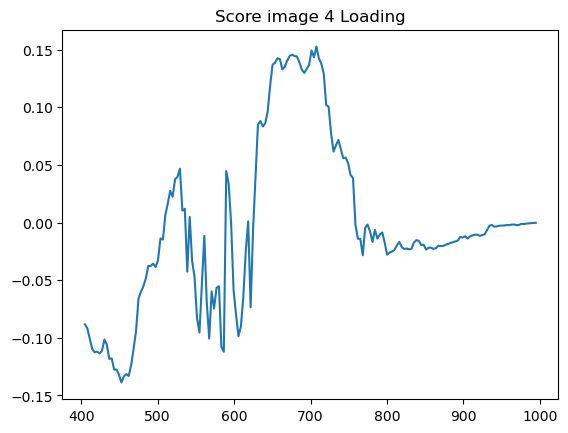

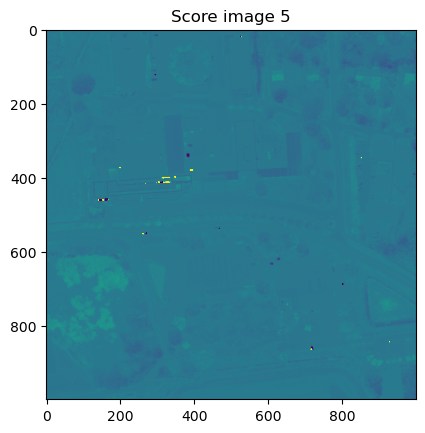

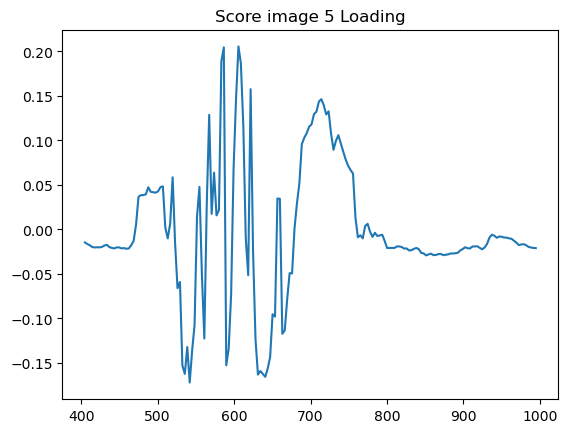

In [10]:
#Create a principal components Analysis of the hole image.
pc = principal_components(hyperim)
img_pc = pc.transform(hyperim)

loading = pc.eigenvectors

#Plotting results
plt.imshow(img_pc[:, :, 0], vmin=-0.1, vmax=0.15)
plt.title('Score image 1')
plt.show()

plt.plot(ww, loading[:, 0])
plt.title('Score image 1 Loading')
plt.show()

plt.imshow(img_pc[:, :, 1], vmin=-0.1, vmax = 0.15)
plt.title('Score image 2')
plt.show()

plt.plot(ww, loading[:, 1])
plt.title('Score image 2 Loading')
plt.show()

plt.imshow(img_pc[:, :, 2], vmin=-0.1, vmax = 0.15)
plt.title('Score image 3')
plt.show()

plt.plot(ww, loading[:, 2])
plt.title('Score image 3 Loading')
plt.show()

plt.imshow(img_pc[:, :, 3], vmin=-0.1, vmax = 0.15)
plt.title('Score image 4')
plt.show()

plt.plot(ww, loading[:, 3])
plt.title('Score image 4 Loading')
plt.show()

plt.imshow(img_pc[:, :, 4], vmin=-0.1, vmax = 0.15)
plt.title('Score image 5')
plt.show()

plt.plot(ww, loading[:, 4])
plt.title('Score image 5 Loading')
plt.show()

We can see that the first 2 images contain the most variance and the other images don't add that much new.

We can also see that the first score image most likely represents vegetation, it has a noticeable peak at the green wavelength as well as the infrared wavelength. 
In the second one, we see a low value in green and a high in infrared, this high in infrared could also categorise vegetation.
In the third one, we see a high value in the blue colour region, and a low in red, which could represent water.

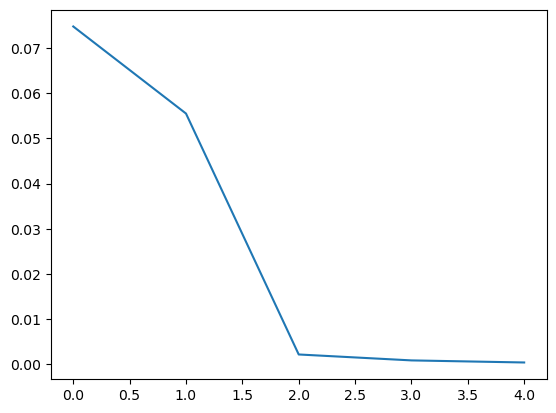

In [11]:
#Plotting the eigenvales of the first 5 score images.
plt.figure()
plt.plot(pc.eigenvalues[0:5])
plt.show()

There's a break in the curve at component no 2 for the same reason the first two images have the most colour.  There is a lot of different information in these two, and in the 3 and 4, we do capture not a lot of variation.

In [12]:
#Test to check wich presentage the 2 score image applay and when the 3 score image applay.
pc_01 = pc.reduce(fraction=0.96693)
img_pc = pc_01.transform(hyperim)
shape = np.shape(img_pc)

pc_02 = pc.reduce(fraction=0.96694)
img_pc2 = pc_02.transform(hyperim)
shape_2 = np.shape(img_pc2)

#Print to check the number of components
print(shape)
print(shape_2)

(1000, 1000, 2)
(1000, 1000, 3)


We see that 2 componets cover 96.693% of the explained variance

In [13]:
#Reduse to only take with 99.9% of the explained variace
pc_0999 = pc.reduce(fraction=0.999)
img_pc = pc_0999.transform(hyperim)
shape = np.shape(img_pc)

#The last element in the print statement diffines number of components needed to explain the choosen fraction.
print(shape)

(1000, 1000, 31)


Here we can see that 31 components cover 99.9% of the explained variance

#### e)

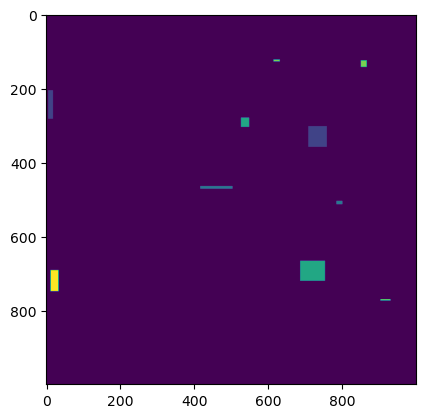

spectral:INFO: Setting min samples to 186


Processing...  0.0Processing... 20.0Processing... 40.0Processing... 60.0Processing... 80.0Processing... 100.Processing...done   


<Figure size 640x480 with 0 Axes>

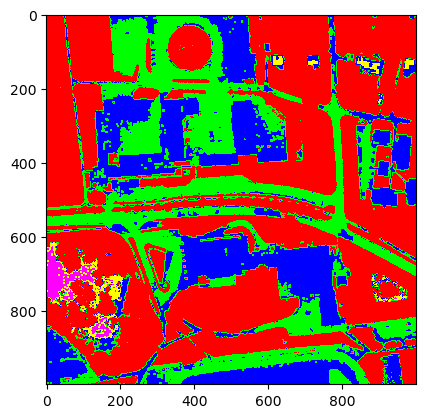

spectral:INFO: Setting min samples to 8


Processing...  0.0Processing... 20.0Processing... 40.0Processing... 60.0Processing... 80.0Processing... 100.Processing...done   


<Figure size 640x480 with 0 Axes>

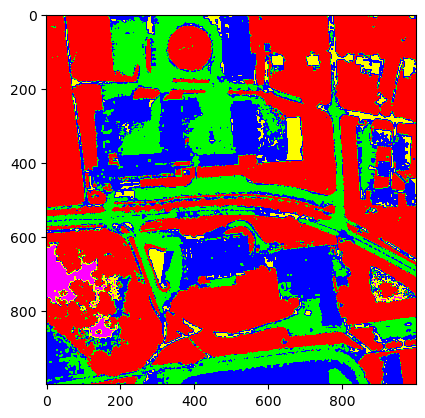

In [14]:
#Create an empty image called groundtruth.
shape = hyperim.shape
groundtruth = np.zeros([shape[0],shape[1]])

#Create pixel areas with the diffined material so we can train the gmlc.
groundtruth[206:283, 6:19] = 1.0   #grass
groundtruth[303:359, 709:759] = 1.0   #grass

groundtruth[465:472, 417:504] = 2.0 # asphalt
groundtruth[505:514, 785:801] = 2.0 # asphalt

groundtruth[667:721, 687:754] = 3.0 # black roof
groundtruth[280:305, 527:549] = 3.0 # black roof

groundtruth[125:143, 851:867] = 4.0 # red roof
groundtruth[123:128, 615:632] = 4.0 # red roof


groundtruth[692:749, 12:34] = 5.0 # water
groundtruth[771:774, 904:931] = 5.0 # water

#Plott the sample areas.
plt.figure()
plt.imshow(groundtruth)
plt.show()

# Gaussian Maximum Likelihood classification
classes = create_training_classes(hyperim, groundtruth)
gmlc = GaussianClassifier(classes)
clmap = gmlc.classify_image(hyperim)

#Plott with all score images
plt.figure()
imshow(classes=clmap)
plt.show()

#Create need training with only the first 8 score images
classes = create_training_classes(img_pc[:, :, 0:8], groundtruth)
gmlc = GaussianClassifier(classes)
clmap = gmlc.classify_image(img_pc[:, :, 0:8])

#Plott with 8 score images
plt.figure()
imshow(classes=clmap)
plt.show()

In the training image we see that:
- Yellow = water 
- Light green = red roofs
- Dark blue = grass/vegetation
- Blue = asphalt
- Light blue = dark roofs


We can see that water isn't very well represented in these images. It managed to get the large water on the left-hand side, but not the small pond on the right-hand side. We also see that asphalt and grass are quite accurate, with some disturbance. 

The differences between using the whole image and only the first 8 score images are noticeable. We get a lot more false true. So we got a lot of places that have red roofs when in reality it doesn't.
#### f)

spectral:INFO: Setting min samples to 186


Processing...  0.0Processing... 20.0Processing... 40.0Processing... 60.0Processing... 80.0Processing... 100.Processing...done   


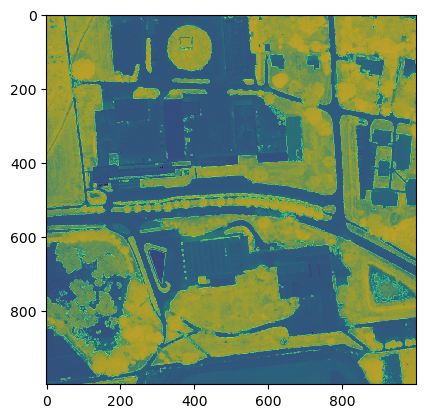

In [15]:
#Create an empty image called groundtruth.
shape = hyperim.shape
groundtruth = np.zeros([shape[0],shape[1]])

groundtruth[206:283, 6:19] = 1.0   #grass
groundtruth[303:359, 709:759] = 1.0   #grass
groundtruth[465:472, 417:504] = 2.0 # asphalt
groundtruth[505:514, 785:801] = 2.0 # asphalt
groundtruth[667:721, 687:754] = 3.0 # black roof
groundtruth[280:305, 527:549] = 3.0 # black roof
groundtruth[125:143, 851:867] = 4.0 # red roof
groundtruth[123:128, 615:632] = 4.0 # red roof
groundtruth[692:749, 12:34] = 5.0 # water
groundtruth[771:774, 904:931] = 5.0 # water


# Gaussian Maximum Likelihood classification
classes = create_training_classes(hyperim, groundtruth)
gmlc = GaussianClassifier(classes)
clmap = gmlc.classify_image(hyperim)

#We remove all the other values than grass
shape = np.shape(clmap)
for i in range(shape[0]):
    for j in range(shape[1]):
        if int(clmap[i][j]) != 1:
            clmap[i][j] = 0
        
#Create edges on the binary image with grass as 1
class_edge = skimage.filters.sobel(clmap)

#Plott the NDVI image and the edge image ontop with a alpha parameter of 0.4.
#The alpha parameter is how visible the top image should be
plt.imshow(ndvi_ima, interpolation='none')
plt.imshow(class_edge, alpha=0.3, interpolation='none')
plt.show()

Found that matplotlib build inn function alpha was the best to layer the two images. Tried first adding all the pixels, one by one, and this image looks exactly like just the NDVI image. But with the built-in function, we can much clearer see the edges and where the vegetation is.